**Importar todas las librerias necesarias**

In [0]:
# Quitar alertas
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [8]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
import talib

--2020-04-20 02:39:42--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 216.105.38.13
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|216.105.38.13|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2020-04-20 02:39:43--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 216.105.38.13
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: https://versaweb.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2020-04-20 02:39:43--  https://versaweb.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving versaweb.dl.so

In [0]:
#Procesamiento
import pandas as pd
from google.colab import files 
import io
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

#Modelos
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import NearestNeighbors

#Métricas
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [82]:
uploaded = files.upload()
df=pd.read_excel(io.BytesIO(uploaded["Base de Datos FX.xlsx"]))

Saving Base de Datos FX.xlsx to Base de Datos FX (6).xlsx


**Creación de funciones propias**

In [0]:
def newtable(df,n):
  new=pd.DataFrame()
  new['PX_LAST']=df['PX_LAST'].groupby(df.index // n).last()
  new['PX_OPEN']=df['PX_OPEN'].groupby(df.index // n).first()
  new['PX_HIGH']=df['PX_HIGH'].groupby(df.index // n).max()
  new['PX_LOW']=df['PX_LOW'].groupby(df.index // n).min()
  new['ADX']=talib.ADX(new["PX_HIGH"],new["PX_LOW"],new["PX_LAST"],14)
  new['ADXR']=talib.ADXR(new["PX_HIGH"],new["PX_LOW"],new["PX_LAST"],14)
  new['APO']=talib.APO(new["PX_LAST"],12,26,0)
  new['AROONOSC']=talib.AROONOSC(new["PX_HIGH"],new["PX_LOW"],14)
  new['BOP']=talib.BOP(new["PX_OPEN"],new["PX_HIGH"],new["PX_LOW"],new["PX_LAST"])
  new['MOM']=talib.MOM(new["PX_LAST"],14)
  new['WILLR']=talib.WILLR(new["PX_HIGH"],new["PX_LOW"],new["PX_LAST"],14)
  new['CMO']=talib.CMO(new["PX_HIGH"],14)
  new['DX']=talib.DX(new["PX_HIGH"],new["PX_LOW"],new["PX_LAST"],14)
  new['MINUS_DI']=talib.MINUS_DI(new["PX_HIGH"],new["PX_LOW"],new["PX_LAST"],14)
  new['MINUS_DM']=talib.MINUS_DM(new["PX_HIGH"],new["PX_LOW"],14)
  new['PLUS_DI']=talib.PLUS_DI(new["PX_HIGH"],new["PX_LOW"],new["PX_LAST"],14)
  new['PLUS_DM']=talib.PLUS_DM(new["PX_HIGH"],new["PX_LOW"],14)
  new['PPO']=talib.PPO(new["PX_LAST"],12,26,0)
  new['TRIX']=talib.TRIX(new["PX_LAST"],30)
  new['ROCR']=talib.ROCR(new["PX_LAST"],10)
  new['CHANG']=new['PX_LAST'].diff()
  new['CHANG'] = new['CHANG'].shift(-1)
  # new['CHANG']= [0 if (a > -0.02 and a < 0.02) else 1 if a >= 0.02 else -1 for a in new['CHANG']]
  new['CHANG']= [0 if (a > -0.02 and a < 0.02) else 1 if a >= 0.02 else -1 for a in new['CHANG']]
  new['CHANG']= [-1 if a < -0.1 else 1 for a in new['CHANG']]
  new=new.dropna()
  return new

In [83]:
df=newtable(df,1)
df

,PX_LAST,PX_OPEN,PX_HIGH,PX_LOW,ADX,ADXR,APO,AROONOSC,BOP,MOM,WILLR,CMO,DX,MINUS_DI,MINUS_DM,PLUS_DI,PLUS_DM,PPO,TRIX,ROCR,CHANG
88,6.4010,6.2950,6.4070,6.2910,33.145890,42.561962,0.111526,85.714286,0.913793,0.4950,-0.977199,39.058495,24.714098,16.889881,0.255515,27.978761,0.423271,1.848959,-0.166523,1.068258,1
89,6.4270,6.4000,6.4610,6.3810,32.967977,42.091217,0.131423,92.857143,0.337500,0.5770,-5.089820,44.048113,30.655109,15.979847,0.237264,30.108183,0.447037,2.174951,-0.157659,1.072239,1
90,6.5050,6.4030,6.5200,6.3960,33.223610,41.620839,0.156865,100.000000,0.822581,0.4670,-2.572899,48.964741,36.546839,14.661232,0.220316,31.549964,0.474106,2.588587,-0.147727,1.086521,1
91,6.5600,6.5050,6.5710,6.4740,33.793182,41.350160,0.182647,71.428571,0.567010,0.5010,-1.735016,52.823776,41.197623,13.708297,0.204580,32.916678,0.491241,3.003443,-0.136755,1.090244,-1
92,6.5290,6.5620,6.5730,6.5110,34.335032,41.184889,0.206122,78.571429,-0.532258,0.5370,-6.918239,52.973949,41.379078,13.121250,0.189967,31.645190,0.458152,3.377406,-0.125152,1.065437,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5253,1.5661,1.5678,1.5849,1.5457,40.508930,41.707763,-0.048810,28.571429,-0.043367,-0.0195,-64.281753,-28.359084,39.845532,32.565329,0.253095,14.007956,0.108869,-2.961380,-0.182975,0.948692,-1
5254,1.5152,1.5747,1.5815,1.5051,40.924628,42.885245,-0.045502,28.571429,-0.778796,0.0084,-94.290560,-29.117152,46.328705,34.535071,0.275617,12.666975,0.101092,-2.778019,-0.193236,0.922665,-1
5255,1.4713,1.5118,1.5220,1.4359,41.943781,43.646211,-0.047533,-78.571429,-0.470383,-0.0559,-85.615603,-40.902425,55.192763,39.306179,0.325130,11.348476,0.093871,-2.925128,-0.204177,0.929203,-1
5256,1.3705,1.4241,1.4308,1.3505,43.466195,44.077540,-0.052829,-85.714286,-0.667497,-0.2286,-93.966817,-53.628906,63.257584,43.571969,0.387306,9.806218,0.087166,-3.286083,-0.217030,0.873152,-1


In [50]:
pd.unique(pd.Series(list(talib.CDL3BLACKCROWS(df["PX_OPEN"],df["PX_HIGH"],df["PX_LOW"],df["PX_LAST"]))))

array([   0, -100])

In [49]:
df.groupby(talib.CDL3BLACKCROWS(df["PX_OPEN"],df["PX_HIGH"],df["PX_LOW"],df["PX_LAST"])).size()

-100       3
 0      5167
dtype: int64

In [51]:
df.groupby(talib.CDL3BLACKCROWS(df["PX_OPEN"],df["PX_HIGH"],df["PX_LOW"],df["PX_LAST"])).groups

{-100: Int64Index([1369, 1377, 2472], dtype='int64'),
 0: Int64Index([  88,   89,   90,   91,   92,   93,   94,   95,   96,   97,
             ...
             5248, 5249, 5250, 5251, 5252, 5253, 5254, 5255, 5256, 5257],
            dtype='int64', length=5167)}

In [0]:
def iterarmodelos(df,v_predecir=newtable(df,1).columns[len(newtable(df,1).columns)-1],agrupaciones=1,modelo='rf',testsize=0.3):
  for i in range(agrupaciones):

    X=np.array(newtable(df,i+1).drop(v_predecir,axis=1))
    y=np.array(newtable(df,i+1)[v_predecir])
    X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=testsize,random_state=42,shuffle=False)

    
    if modelo == 'rf':
      model=RandomForestClassifier()
      # param_grid = {'n_estimators': [100,200,500],'max_features': ['auto', 'sqrt', 'log2'],'max_depth':[4,5,6,7,8],'criterion':['gini', 'entropy']}
      # model= GridSearchCV(estimator=model, param_grid=param_grid, cv= 5, scoring = 'accuracy')
    elif modelo=='sv':
      model=SVC()
      # tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],                     'C': [1, 10, 100, 1000]},                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
      # model= GridSearchCV(estimator=model, param_grid=tuned_parameters, cv= 5)
    elif modelo=='dt':
      model=DecisionTreeClassifier()
      # parameters={'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}
      # model=grid_search.GridSearchCV(model,parameters,cv=5, scoring = 'accuracy')
    elif modelo=='gb':
      model=GradientBoostingClassifier()
      # parameters = {"loss":["deviance"],    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],    "min_samples_split": np.linspace(0.1, 0.5, 12),    "min_samples_leaf": np.linspace(0.1, 0.5, 12),    "max_depth":[3,5,8],    "max_features":["log2","sqrt"],    "criterion": ["friedman_mse",  "mae"],    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],    "n_estimators":[10]    }
      # model = GridSearchCV(model, parameters, cv=5, n_jobs=-1)
    elif modelo=='rl':
      model=LogisticRegression()
      # parameters={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
      # model=GridSearchCV(model,grid,cv=5, scoring = 'accuracy')
    elif modelo=='kn':
      model=KNeighborsClassifier()
      # param_grid = dict(n_neighbors = k_range, weights = weight_options)
      # model = GridSearchCV(model, param_grid, cv = 5, scoring = 'accuracy')
    else:
      print('la función no está entrenada para este algoritmo')
      break

    model.fit(X_train,y_train)
    print(accuracy_score(y_test,model.predict(X_test)))

**Preprocesamiento de datos**

In [75]:
newtable(df,1).describe()

,PX_LAST,PX_OPEN,PX_HIGH,PX_LOW,ADX,ADXR,APO,AROONOSC,BOP,MOM,WILLR,CMO,DX,MINUS_DI,MINUS_DM,PLUS_DI,PLUS_DM,PPO,TRIX,ROCR,CHANG
count,5082.000000,5082.000000,5082.000000,5082.000000,5082.000000,5082.000000,5082.000000,5082.000000,5082.000000,5082.000000,5082.000000,5082.000000,5082.000000,5082.000000,5082.000000,5082.000000,5082.000000,5082.000000,5082.000000,5082.000000,5082.000000
mean,3.307830,3.308484,3.347763,3.269505,25.558789,25.557589,-0.005814,-6.774611,-0.018139,-0.011632,-52.296044,-3.110304,25.566701,22.608060,0.249370,21.321426,0.236286,-0.175305,-0.024056,0.999068,0.301850
std,1.144411,1.144514,1.147361,1.142234,10.162921,9.098352,0.084584,66.082935,0.565141,0.199325,30.770783,26.215907,17.693903,7.304249,0.120253,7.444253,0.119777,2.887149,0.198669,0.058182,0.953449
min,1.327100,1.362900,1.393400,1.318000,8.138200,9.647658,-0.436657,-100.000000,-1.001934,-1.194000,-100.000000,-71.590874,0.017338,3.141195,0.032257,4.018098,0.041760,-13.396069,-0.802565,0.706674,-1.000000
25%,2.294375,2.294025,2.328200,2.259550,17.758593,18.574631,-0.061240,-64.285714,-0.532433,-0.140800,-80.870258,-22.665166,10.898398,17.405701,0.167116,15.842405,0.150567,-1.861444,-0.133997,0.964065,-1.000000
50%,3.188650,3.190350,3.235000,3.151000,23.730394,24.174260,-0.009005,-28.571429,0.000000,-0.017800,-53.738563,-3.611425,23.029855,22.239883,0.225833,20.598370,0.209297,-0.288170,-0.025094,0.995145,1.000000
75%,4.269000,4.271500,4.308275,4.227525,31.306432,30.812638,0.049781,57.142857,0.492626,0.113900,-24.664986,15.841405,37.323542,27.311102,0.303388,26.133972,0.290422,1.552452,0.087848,1.030837,1.000000
max,5.897000,5.892000,5.924000,5.846000,62.651203,60.416605,0.291442,100.000000,1.000000,0.779000,-0.000000,77.102051,88.138458,53.576665,1.069755,54.486308,0.797023,12.096922,0.718678,1.325752,1.000000


In [84]:
# De esta forma se utiliza la función
#Se pueden seleccionar los siguientes modelos: 'sv' -> Support Vector Machine, 'rf' -> Random Forest, 'gb' -> Gradient Boosting, 'kn' -> Knn, 'rl' -> 'Regresión Logística'
print('SVC')
iterarmodelos(df,modelo='sv',agrupaciones=15)
print('random forest')
iterarmodelos(df,modelo='rf',agrupaciones=15)
print('knn')
iterarmodelos(df,modelo='kn',agrupaciones=15)
print('gradient boosting')
iterarmodelos(df,modelo='gb',agrupaciones=15)
print('regresión logística')
iterarmodelos(df,modelo='rl',agrupaciones=15)

SVC
0.6865573770491803
0.6226666666666667
0.5906313645621182
0.5773480662983426
0.5263157894736842
0.5407725321888412
0.5102040816326531
0.49404761904761907
0.4897959183673469
0.4806201550387597
0.48695652173913045
0.5096153846153846
0.5
0.4823529411764706
0.47435897435897434
random forest
0.6701639344262295
0.5813333333333334
0.5539714867617108
0.5303867403314917
0.5824561403508772
0.5278969957081545
0.5255102040816326
0.49404761904761907
0.4897959183673469
0.4883720930232558
0.5478260869565217
0.5288461538461539
0.5212765957446809
0.43529411764705883
0.44871794871794873
knn
0.5914754098360656
0.5026666666666667
0.5254582484725051
0.5662983425414365
0.47719298245614034
0.48497854077253216
0.4897959183673469
0.5595238095238095
0.5238095238095238
0.49612403100775193
0.4608695652173913
0.3942307692307692
0.4574468085106383
0.4470588235294118
0.46153846153846156
gradient boosting
0.6721311475409836
0.5893333333333334
0.5498981670061099
0.5276243093922652
0.4982456140350877
0.5064377682403

Si se quiere cambiar el número de agrupaciones o el modelo hay que cambiar el número de la siguiente variable:

In [0]:
agrupa=1
#modelo=GradientBoostingClassifier()
# modelo=RandomForestClassifier()
# modelo=KNeighborsClassifier()
#modelo=SVC()
modelo=LogisticRegression()
# modelo=DecisionTreeClassifier()

In [86]:
X=np.array(newtable(df,agrupa).drop('CHANG',axis=1))
y=np.array(newtable(df,agrupa)['CHANG'])
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42,shuffle=False)
modelo.fit(X_train,y_train)
print(accuracy_score(y_test,modelo.predict(X_test)))

0.6865573770491803


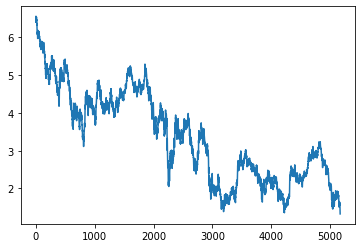

In [87]:
plt.plot(range(0,5170),df['PX_LAST'])

In [62]:
X=np.array(newtable(df,agrupa)[-10:].drop('CHANG',axis=1))
y=np.array(newtable(df,agrupa)[-10:]['CHANG'])
normal=newtable(df,agrupa)[-10:]
normal['real']=y
normal['estimado']=modelo.predict(X)
normal

,PX_LAST,PX_OPEN,PX_HIGH,PX_LOW,ADX,ADXR,APO,AROONOSC,BOP,MOM,WILLR,CMO,DX,MINUS_DI,MINUS_DM,PLUS_DI,PLUS_DM,PPO,TRIX,ROCR,CHANG,real,estimado
366,1.7316,1.5876,1.7437,1.4272,31.648024,32.050997,-0.378898,-100.000000,0.454976,-1.1259,-79.563612,-56.587489,58.795139,37.864141,1.249818,9.825154,0.324308,-14.497876,0.331750,0.656979,-1,-1,-1
367,1.6646,1.7281,1.9046,1.6267,32.462352,31.307433,-0.414293,-92.857143,-0.228499,-1.0536,-82.666472,-40.316186,43.048616,34.716466,1.160546,13.821530,0.462043,-16.164157,0.279892,0.639419,1,1,-1
368,1.7536,1.6680,1.7973,1.5034,33.526233,30.873147,-0.442505,-78.571429,0.291256,-0.9968,-76.168224,-44.460881,47.356683,35.342364,1.200950,12.626094,0.429040,-17.575500,0.226901,0.702733,1,1,-1
369,1.9173,1.7379,1.9713,1.6684,33.428869,29.927255,-0.461087,-78.571429,0.592275,-0.7773,-63.387121,-28.836297,32.163131,32.246789,1.115167,16.551675,0.572395,-18.598571,0.175367,0.757078,-1,-1,-1
370,1.7654,1.9173,1.9556,1.7056,33.338459,29.204599,-0.481009,-64.285714,-0.607600,-0.8703,-74.734798,-29.576432,32.163131,29.917635,1.035513,15.356164,0.531509,-19.727694,0.123891,0.743890,1,1,-1
371,1.8801,1.7654,1.9465,1.6917,33.300356,28.714846,-0.493279,-64.285714,0.450157,-0.7232,-62.411818,-30.030674,32.805022,28.120747,0.975447,14.228174,0.493544,-20.586369,0.074279,0.882842,-1,-1,-1
372,1.8090,1.8836,1.9503,1.7586,33.238622,28.246898,-0.498392,-57.142857,-0.389150,-0.6864,-67.777872,-29.654591,32.436082,26.541139,0.905773,13.540293,0.462091,-21.169966,0.025936,0.898079,-1,-1,-1
373,1.6839,1.8090,1.8984,1.6684,33.501291,28.229535,-0.490284,-50.000000,-0.543913,-0.8486,-77.614023,-32.525034,36.915976,27.398916,0.931275,12.624048,0.429085,-21.233677,-0.022224,0.793581,-1,-1,-1
374,1.6173,1.6270,1.6820,1.5017,34.270517,29.069480,-0.467771,-42.857143,-0.053799,-0.7559,-81.207987,-42.973744,44.270459,30.897010,1.031455,11.935057,0.398436,-20.758496,-0.070445,0.854133,-1,-1,-1
375,1.3271,1.6173,1.6173,1.3188,35.466753,30.228903,-0.463901,-100.000000,-0.972194,-0.8025,-99.031844,-45.682034,51.017816,33.565094,1.140680,10.886739,0.369976,-21.247757,-0.121388,0.835022,1,1,-1


In [65]:
y_test

array([ 1, -1,  1,  1, -1,  1, -1, -1, -1,  1, -1,  1, -1,  1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1, -1, -1,  1,
        1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1,
       -1, -1,  1, -1, -1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1,
       -1, -1, -1,  1, -1, -1,  1, -1,  1,  1, -1,  1, -1, -1, -1, -1,  1])

In [66]:
modelo.predict(X_test)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1,  1, -1,
        1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])